
8.Write a python program to extract information about the local weather from the National Weather Service website of USA, https://www.weather.gov/ for the city, San Francisco. You need to extract data about 7 day extended forecast display for the city. The data should include period, short description, temperature and description.

In [2]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import requests

In [4]:
driver = webdriver.Chrome(r"C:\Users\Scp\Desktop\fliprobo\chromedriver.exe")

In [5]:
driver.get("https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c")

<html dir="ltr" lang="en-US"><head><script async="" id="tb_loader_script" src="//cdn.taboola.com/libtrc/theweatherchannel/loader.js"></script><script src="https://cdn.optimizely.com/public/2972860641/17941370450/25_8b2d74b884623f771854d5167468b9ac7724da9cbc4f22ddd898431056975ff7_tracking.js" type="text/javascript"></script>
<script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script src="https://bam-cell.nr-data.net/1/e6bbbab7f0?a=390783636&amp;v=1184.ab39b52&amp;to=Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVddTUEAU0FRVRMbRFRcBgNPSl4aA1wOV3lV&amp;rst=4625&amp;ck=0&amp;ref=https://weather.com/weather/tenday/l/San%2BFrancisco%2BCA&amp;ap=427.729112&amp;be=1168&amp;fe=4300&amp;dc=4179&amp;tt=5400ff55a5ffc4&amp;perf=%7B%22timing%22:%7B%22of%22:1607201830542,%22n%22:0,%22f%22:1,%22dn%22:12,%22dne%22:92,%22c%22:92,%22s%22:132,%22ce%22:213,%22rq%22:217,%22rp%22:1050,%22rpe%22:1359,%22dl%22:1095,%22di%22:2905,%22ds%22:4179,%22de%22:4179,%22dc%22:4299,%22l%22:4299,%22le%22:430
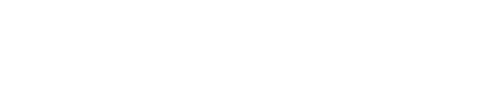
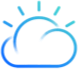

In [6]:
content = driver.page_source
soup = BeautifulSoup(content)
print(soup)

In [7]:
period = soup.find_all('h2', class_ = 'DetailsSummary--daypartName--1Mebr' )

Period = []

for i in period:
    Period.append(i.text)
    
Period

['Today',
 'Sun 06',
 'Mon 07',
 'Tue 08',
 'Wed 09',
 'Thu 10',
 'Fri 11',
 'Sat 12',
 'Sun 13',
 'Mon 14',
 'Tue 15',
 'Wed 16',
 'Thu 17',
 'Fri 18',
 'Sat 19']

In [8]:
temperature = soup.find_all('div', class_ = 'DetailsSummary--temperature--3FMlw')

Temperature = []

for i in temperature:
    Temperature.append(i.text)

Temperature


['59°/46°',
 '58°/49°',
 '68°/46°',
 '64°/43°',
 '61°/47°',
 '61°/43°',
 '60°/42°',
 '60°/42°',
 '60°/43°',
 '61°/43°',
 '60°/41°',
 '59°/41°',
 '59°/42°',
 '59°/43°',
 '59°/43°']

In [9]:
description = soup.find_all('span', class_ = 'DetailsSummary--extendedData--aaFeV')

Description = []

for i in description:
    Description.append(i.text)
    
Description

['Cloudy',
 'AM Fog/PM Sun',
 'Sunny',
 'Partly Cloudy',
 'Mostly Sunny',
 'Mostly Sunny',
 'Sunny',
 'Partly Cloudy',
 'Partly Cloudy',
 'Partly Cloudy',
 'Mostly Sunny',
 'Partly Cloudy',
 'AM Showers',
 'Showers',
 'Showers']

In [10]:
short_description_wind = soup.find_all('div', class_ = 'DetailsSummary--wind--Cv4BH DetailsSummary--extendedData--aaFeV')

Short_Description = []

for i in short_description_wind:
    Short_Description.append(i.text)
    
Short_Description

['W 8 mph',
 'NW 9 mph',
 'NNE 15 mph',
 'N 7 mph',
 'N 8 mph',
 'NW 13 mph',
 'NNW 9 mph',
 'N 7 mph',
 'N 7 mph',
 'NNW 7 mph',
 'NW 9 mph',
 'NW 8 mph',
 'SW 7 mph',
 'SW 8 mph',
 'WSW 8 mph']

In [12]:
print(len(Period))
print(len(Temperature))
print(len(Description))
print(len(Short_Description))

15
15
15
15


In [14]:
df=pd.DataFrame({"Period":Period[0:7],"Temperature":Temperature[0:7], "Description":Description[0:7], "Short_Description": Short_Description[0:7]})

In [15]:
df

,Period,Temperature,Description,Short_Description
0,Today,59°/46°,Cloudy,W 8 mph
1,Sun 06,58°/49°,AM Fog/PM Sun,NW 9 mph
2,Mon 07,68°/46°,Sunny,NNE 15 mph
3,Tue 08,64°/43°,Partly Cloudy,N 7 mph
4,Wed 09,61°/47°,Mostly Sunny,N 8 mph
5,Thu 10,61°/43°,Mostly Sunny,NW 13 mph
6,Fri 11,60°/42°,Sunny,NNW 9 mph


In [16]:
df.to_csv('7_day_forecast.csv', index = False, encoding = 'utf-8-sig')

In [17]:
pd.read_csv('7_day_forecast.csv')

,Period,Temperature,Description,Short_Description
0,Today,59°/46°,Cloudy,W 8 mph
1,Sun 06,58°/49°,AM Fog/PM Sun,NW 9 mph
2,Mon 07,68°/46°,Sunny,NNE 15 mph
3,Tue 08,64°/43°,Partly Cloudy,N 7 mph
4,Wed 09,61°/47°,Mostly Sunny,N 8 mph
5,Thu 10,61°/43°,Mostly Sunny,NW 13 mph
6,Fri 11,60°/42°,Sunny,NNW 9 mph


In [18]:
driver.close

<bound method WebDriver.close of <selenium.webdriver.chrome.webdriver.WebDriver (session="b32c737e393cbb405b2c9e888c8eb9a9")>>